In [1]:
import numpy as np
import matplotlib.pyplot as plt

### $$\frac{d^2u}{d \theta ^2}=1-u+ \frac{3G^2M^2}{L^2}u^2$$

In [2]:
def f(t,u,G,M,L):
    return 3*G**2*M**2/L**2*u**2-u+1

In [3]:
'''
N = 5*8000
G = 1.0
M = 0.2
L = 1.0
E = 10.0

u0 = 0.5
uh0 = 0.0
theta0 = 0
dtheta = 0.0008


N = 5*8000
G = 6.67e-11
M = 1.99e+10
L = 2.71e+15
E = 2.71e+16

u0 = 0.5
uh0 = 0.0
theta0 = 0
dtheta = 0.0008

N = 200
G = 6.67e-11
M = 1.99e+30
L = 3.364e+18
E = 2.71e+2 * 0

u0 = 0.1
uh0 = 0
theta0 = 0
dtheta = 0.01

'''



N = 1000
G = 6.67e-11
M = 1.99e+25
L = 2.71e+20
E = 2.71e+16

u0 = 0.5
uh0 = 0.0
theta0 = 0
dtheta = 0.01

In [4]:
theta = theta0
u = u0
uh = uh0
#r = 58e6 * 1000 
r = L**2/(G*M*u)
x = r*np.cos(theta)
y = r*np.sin(theta)
t = 0

In [5]:
X = []
Y = []
T = []

### $$u=\frac{L^2}{GMr}$$
### $$d\tau = \frac{r^2}{L} d\theta$$
### $$dt = \frac{E}{1-\frac{2GM}{r}} d\tau$$

In [6]:
for i in range(1,N):
    u_o = u
    uh_o = uh
    h = dtheta

    # Heun's Methode
    uh_hat = uh_o + h*f(theta,u_o,G,M,L)
    u = u_o + 0.5*h*(uh_o + uh_hat)

    u_hat = u_o + h*uh_o
    uh = uh_o + 0.5*h*(f(theta, u_o, G, M, L) + f(theta, u_hat, G, M, L))

    r = L**2/(G*M*u)

    d_tau = r**2 * dtheta / L
    dt = E * d_tau / (1.0 - 2 * G * M / r)
    t = t + dt

    theta = theta + dtheta
    x = r*np.cos(theta)
    y = r*np.sin(theta)

    X.append(x)
    Y.append(y)
    T.append(t)

In [7]:
plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  '#373e4b',
    "axes.facecolor": '#373e4b',
})

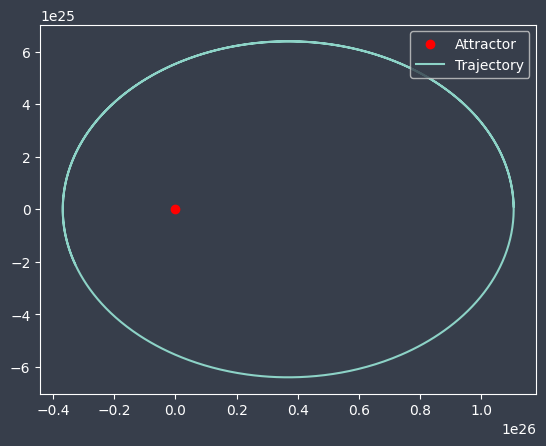

In [8]:
plt.scatter(0,0, c='r', label='Attractor')
plt.plot(X,Y, label='Trajectory')
plt.legend(loc="upper right")
plt.show()

In [9]:
def sphere(radius):
    theta = np.linspace(0,2*np.pi)
    phi = np.linspace(0,2*np.pi)

    theta,phi = np.meshgrid(theta,phi)

    x = radius * np.sin(theta) * np.cos(phi)
    y = radius * np.sin(theta) * np.sin(phi)
    z = radius * np.cos(theta)

    return x,y,z

In [10]:
a,b,c = sphere(6.9634e8 / 2.5)

In [11]:
import plotly.graph_objs as go
import numpy as np 

Scale = 1/5e15

x = np.array(X) * Scale
y = np.array(Y) * Scale
z = np.zeros(len(X)-4)

N = max(max(x),max(y))

fig = go.Figure(data=[go.Scatter3d(x=x, y=y,z=z, mode='lines', name='Trajectory'), go.Scatter3d(x=a.flatten(), y=b.flatten(),z=c.flatten(), mode='lines', name='Attractor')])

fig.update_layout(
        title = dict(text="TITLE"), 
        template= "plotly_dark", 
        margin=dict(l=0, r=0, b=0, t=0), 
        scene=dict(camera=dict(eye=dict(x=1.25, y=1.25, z=1.25)), #the default values are 1.25, 1.25, 1.25
        xaxis=dict(range=[-N,N]),
        yaxis=dict(range=[-N,N]),
        zaxis=dict(range=[-N,N]),
        aspectmode='cube', #this string can be 'data', 'cube', 'auto', 'manual'
        #a custom aspectratio is defined as follows:
        #aspectratio=dict(x=1, y=1, z=1)
                ))

fig.layout.scene.camera.projection.type = "orthographic"
fig.show() 